In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv(r'C:\Prabhu\Study Materials\MyProjects\50_Startups.txt')

In [14]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [25]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,4]

In [29]:
## There are 3 values in states and each state

States=pd.get_dummies(X['State'],drop_first=True)


In [31]:
States.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [32]:
X=X.drop('State',axis=1)

In [33]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [35]:
X=pd.concat([X,States],axis=1)

## Splitting the dataset into training and trest data

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regressor=LinearRegression()

In [43]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [44]:
Y_Pred = regressor.predict(X_test)

In [45]:
from sklearn.metrics import r2_score

In [46]:
score=r2_score(Y_Pred,Y_test)

In [47]:
score

0.9293749209318108

## If R squared value is close to 1, then its a good model

In [56]:
print(regressor.coef_)

[ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]


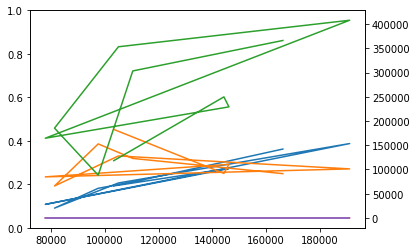

In [54]:
graph = plt.twinx()
graph.plot(Y_test,X_test)

In [63]:
Result = pd.DataFrame({'Actual':Y_test,'Predicted':Y_Pred})

In [64]:
Result

,Actual,Predicted
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


In [65]:
from sklearn import metrics

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_Pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_Pred)))

Mean Absolute Error: 7514.293659640614
Mean Squared Error: 83502864.03257762
Root Mean Squared Error: 9137.990152794959


## 10 percent of Profit mean is 11201.2. Root mean square is lesser than that which means our model is good enough.